In [1]:
# =======================
# 📦 1. Import Libraries
# =======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# =======================
# 📥 2. Load & Inspect Data
# =======================
df = pd.read_csv("C:\\Users\\marin\\Jupyter Notebooks\\Banking Data Analysis\\Banking.csv")
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [4]:
# =======================
# 🔧 3. Data Cleaning
# =======================
# Convert data types
df['client_id'] = df['client_id'].astype(str)
df['name'] = df['name'].astype(str)
df['joined_bank'] = pd.to_datetime(df['joined_bank'], errors='coerce')

categorical_cols = [
    'banking_contact', 'nationality', 'occupation',
    'fee_structure', 'loyalty_classification'
]
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Check and handle missing values
print(df.isnull().sum())
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numeric NaNs with median
df['joined_bank'].fillna(df['joined_bank'].mode()[0], inplace=True)  # Fill date NaNs

# Drop duplicates
df = df.drop_duplicates()

client_id                      0
name                           0
age                            0
location_id                    0
joined_bank                 1810
banking_contact                0
nationality                    0
occupation                     0
fee_structure                  0
loyalty_classification         0
estimated_income               0
superannuation_savings         0
amount_of_credit_cards         0
credit_card_balance            0
bank_loans                     0
bank_deposits                  0
checking_accounts              0
saving_accounts                0
foreign_currency_account       0
business_lending               0
properties_owned               0
risk_weighting                 0
brid                           0
genderid                       0
iaid                           0
dtype: int64


C:\Users\marin\AppData\Local\Temp\ipykernel_5768\233582207.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['joined_bank'].fillna(df['joined_bank'].mode()[0], inplace=True)  # Fill date NaNs


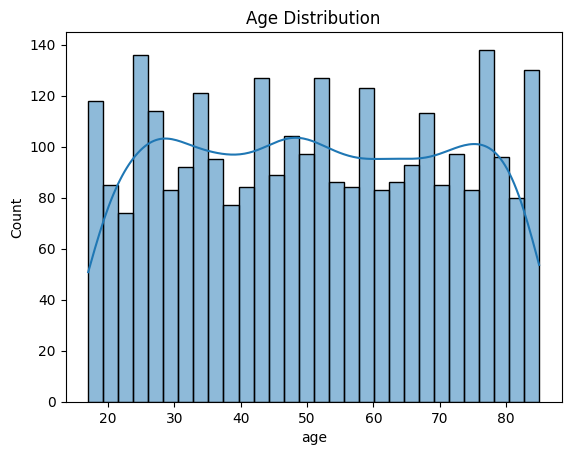

In [5]:
# =======================
# 📊 4. Exploratory Data Analysis (EDA)
# =======================
# Tenure in years
df['tenure_years'] = (pd.Timestamp.today() - df['joined_bank']).dt.days / 365

# Distribution plots
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

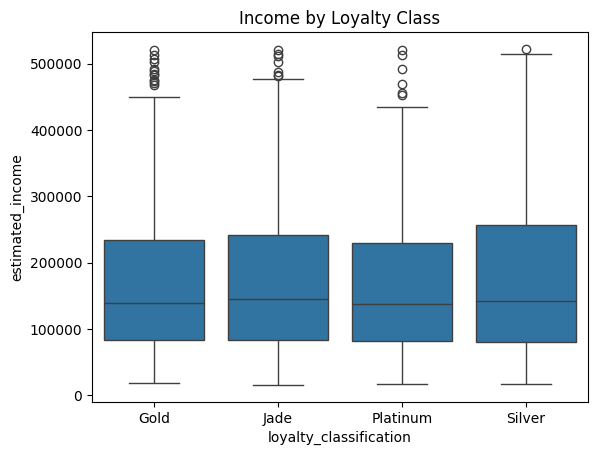

In [6]:
sns.boxplot(x='loyalty_classification', y='estimated_income', data=df)
plt.title('Income by Loyalty Class')
plt.show()

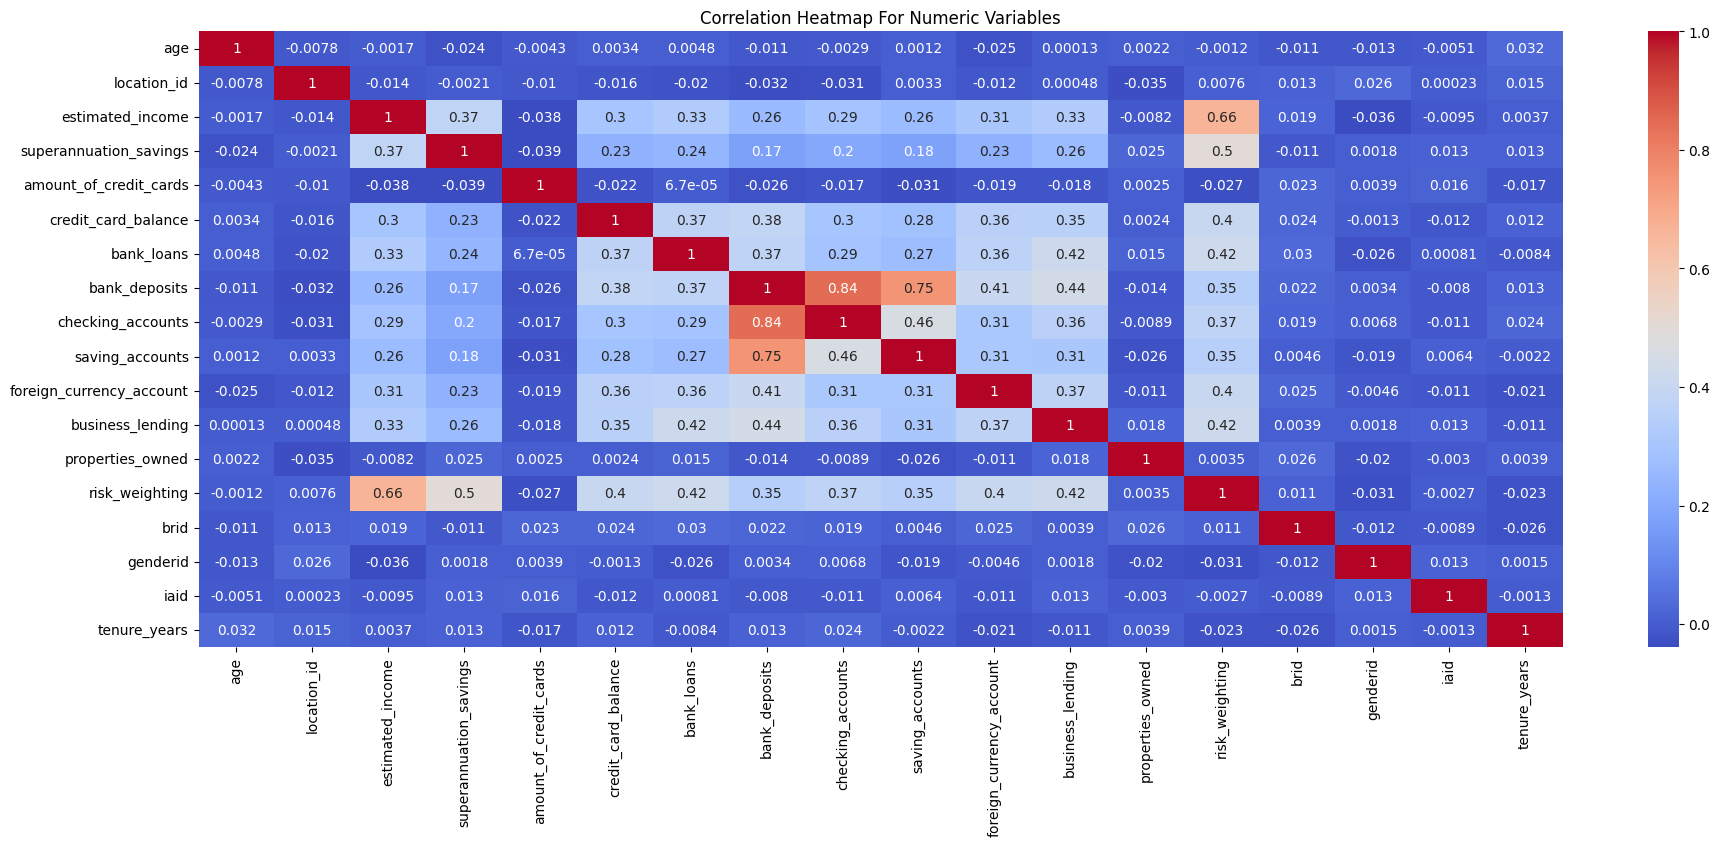

In [9]:
# Correlation heatmap
plt.figure(figsize=(22,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap For Numeric Variables')
plt.show()

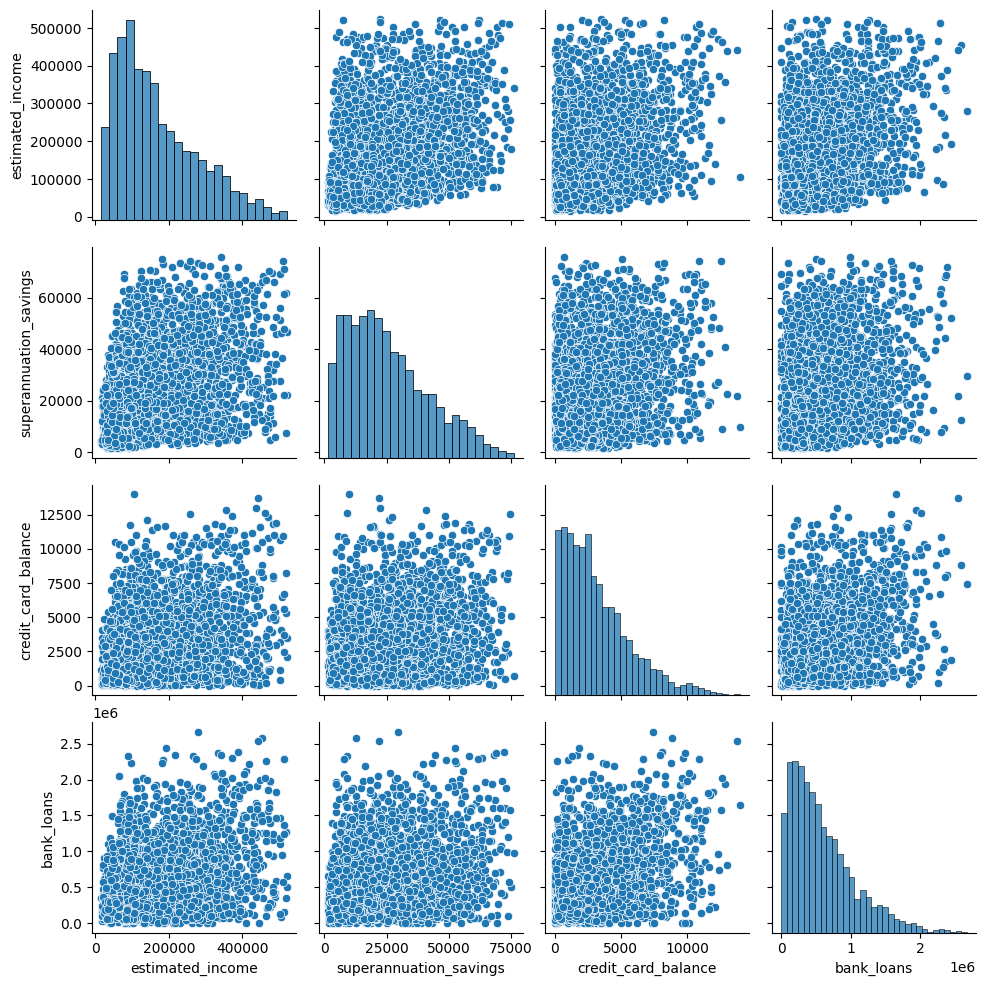

In [10]:
# Pairplot for selected variables
sns.pairplot(df[['estimated_income', 'superannuation_savings', 
                 'credit_card_balance', 'bank_loans']])
plt.show()

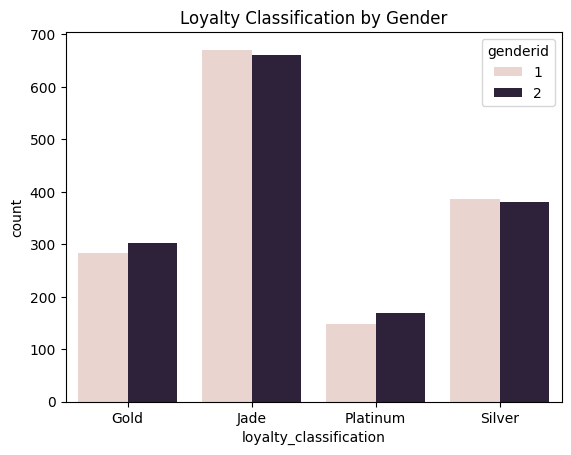

In [12]:
# =======================
# 🎨 5. Meaningful Visualizations
# =======================
# Interactive pie chart
# fig = px.pie(df, names='occupation', title='Occupation Distribution')
# fig.show()

# Bar plot by loyalty and gender
sns.countplot(x='loyalty_classification', hue='genderid', data=df)
plt.title('Loyalty Classification by Gender')
plt.show()

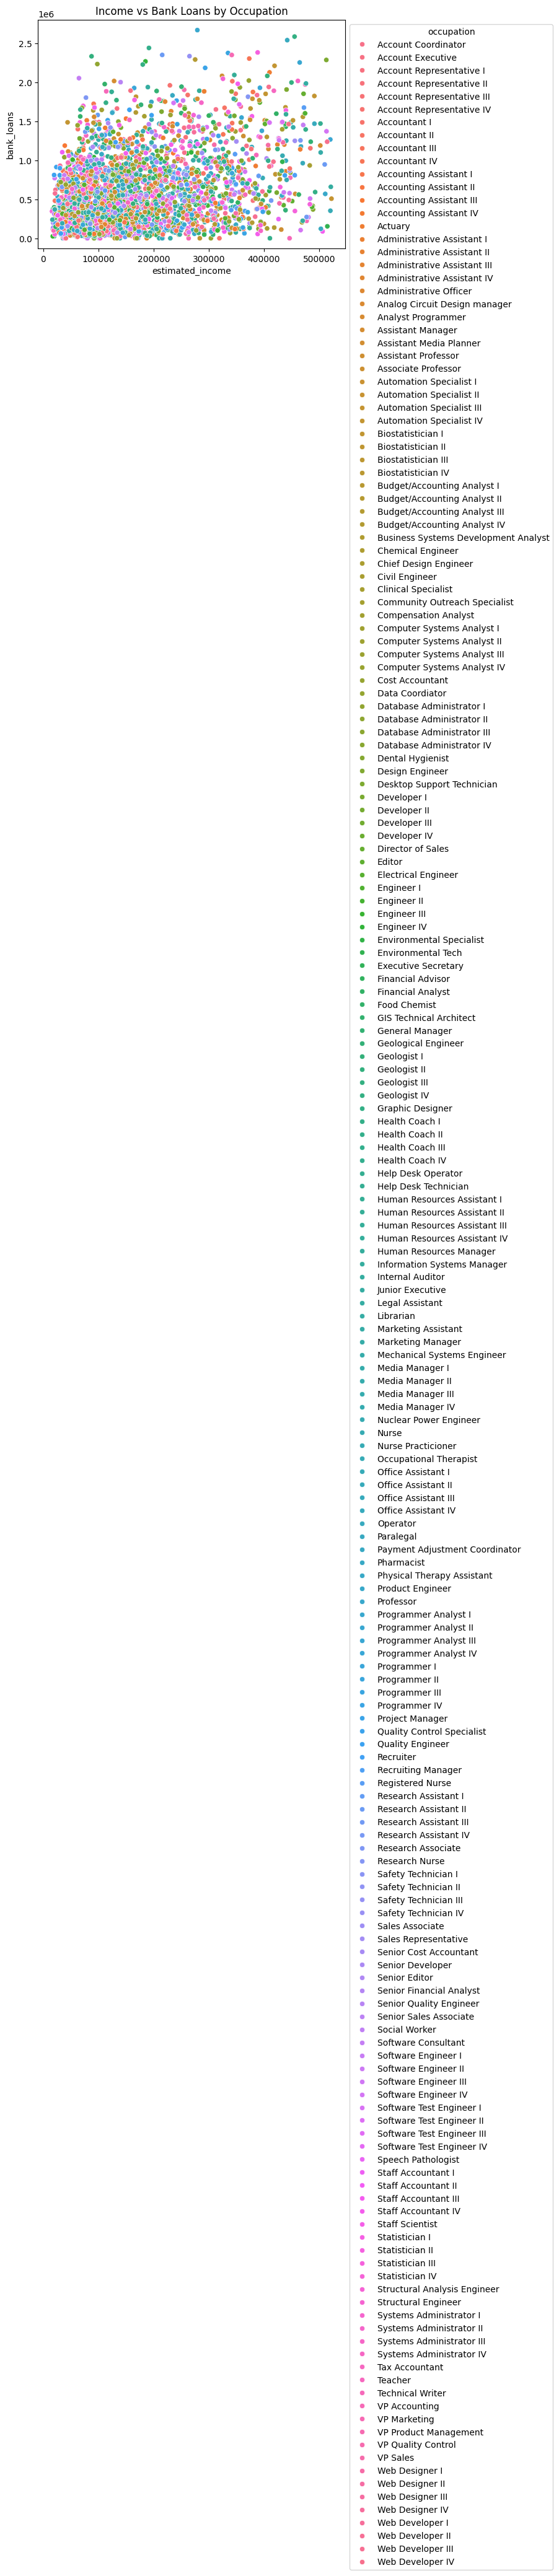

In [16]:
# Scatterplot of income vs bank loans
plt.figure
ax = sns.scatterplot(x='estimated_income', y='bank_loans', hue='occupation', data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Income vs Bank Loans by Occupation')
plt.show()

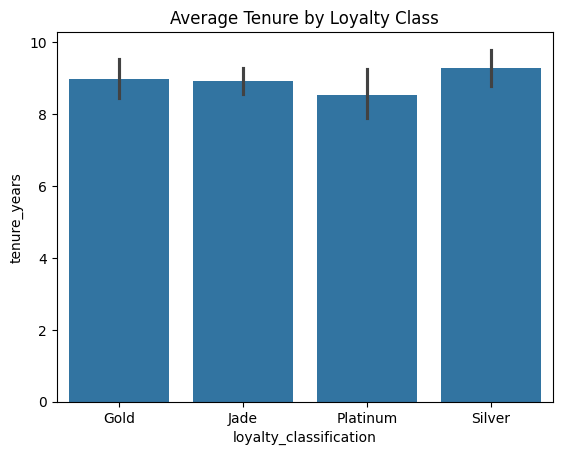

In [17]:
# Tenure vs deposits
sns.barplot(x='loyalty_classification', y='tenure_years', data=df)
plt.title('Average Tenure by Loyalty Class')
plt.show()

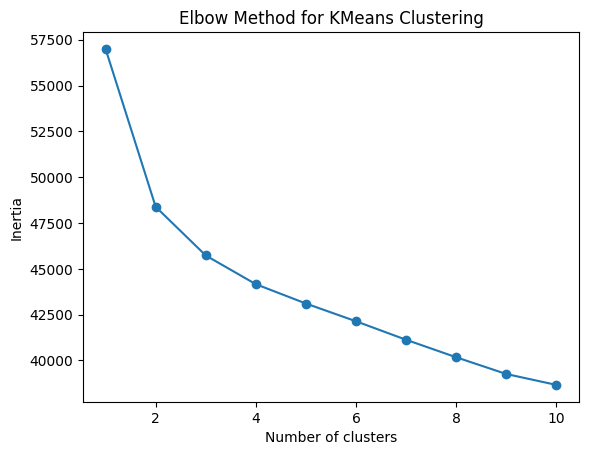

In [18]:
# =======================
# ⛏ 6. Data Mining / Clustering
# =======================
# Encode categorical
le = LabelEncoder()
df['occupation_encoded'] = le.fit_transform(df['occupation'])

# Scale numerical data
num_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_cols])

# KMeans clustering
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans Clustering')
plt.show()

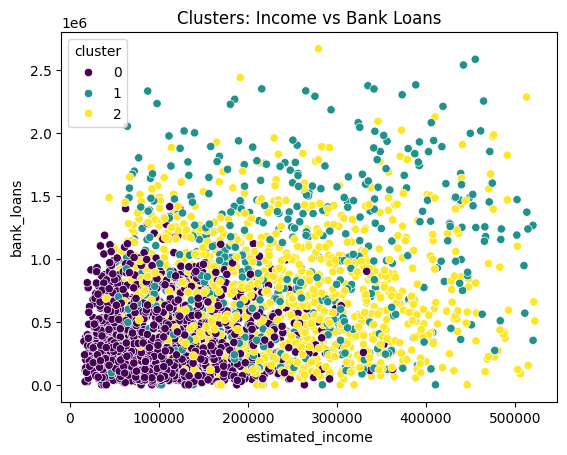

In [21]:
# Fit best cluster (let’s assume k=3 from elbow)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Visualize clusters
sns.scatterplot(data=df, x='estimated_income', y='bank_loans', hue=df['cluster'], palette='viridis')
plt.title('Clusters: Income vs Bank Loans')
plt.show()

In [22]:
# =======================
# 📈 7. Prediction / Regression Analysis
# =======================
# Predict bank deposits from income and loans
X = df[['estimated_income', 'bank_loans', 'age', 'tenure_years']]
y = df['bank_deposits']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Evaluation
print('R² score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R² score: 0.14026500592298852
RMSE: 601397.135715866


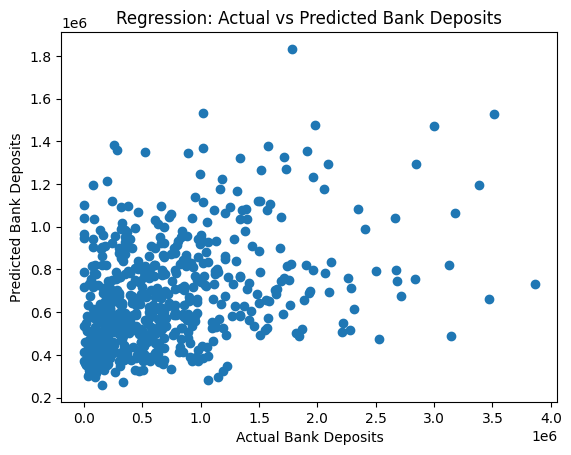

In [23]:
# Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Bank Deposits')
plt.ylabel('Predicted Bank Deposits')
plt.title('Regression: Actual vs Predicted Bank Deposits')
plt.show()

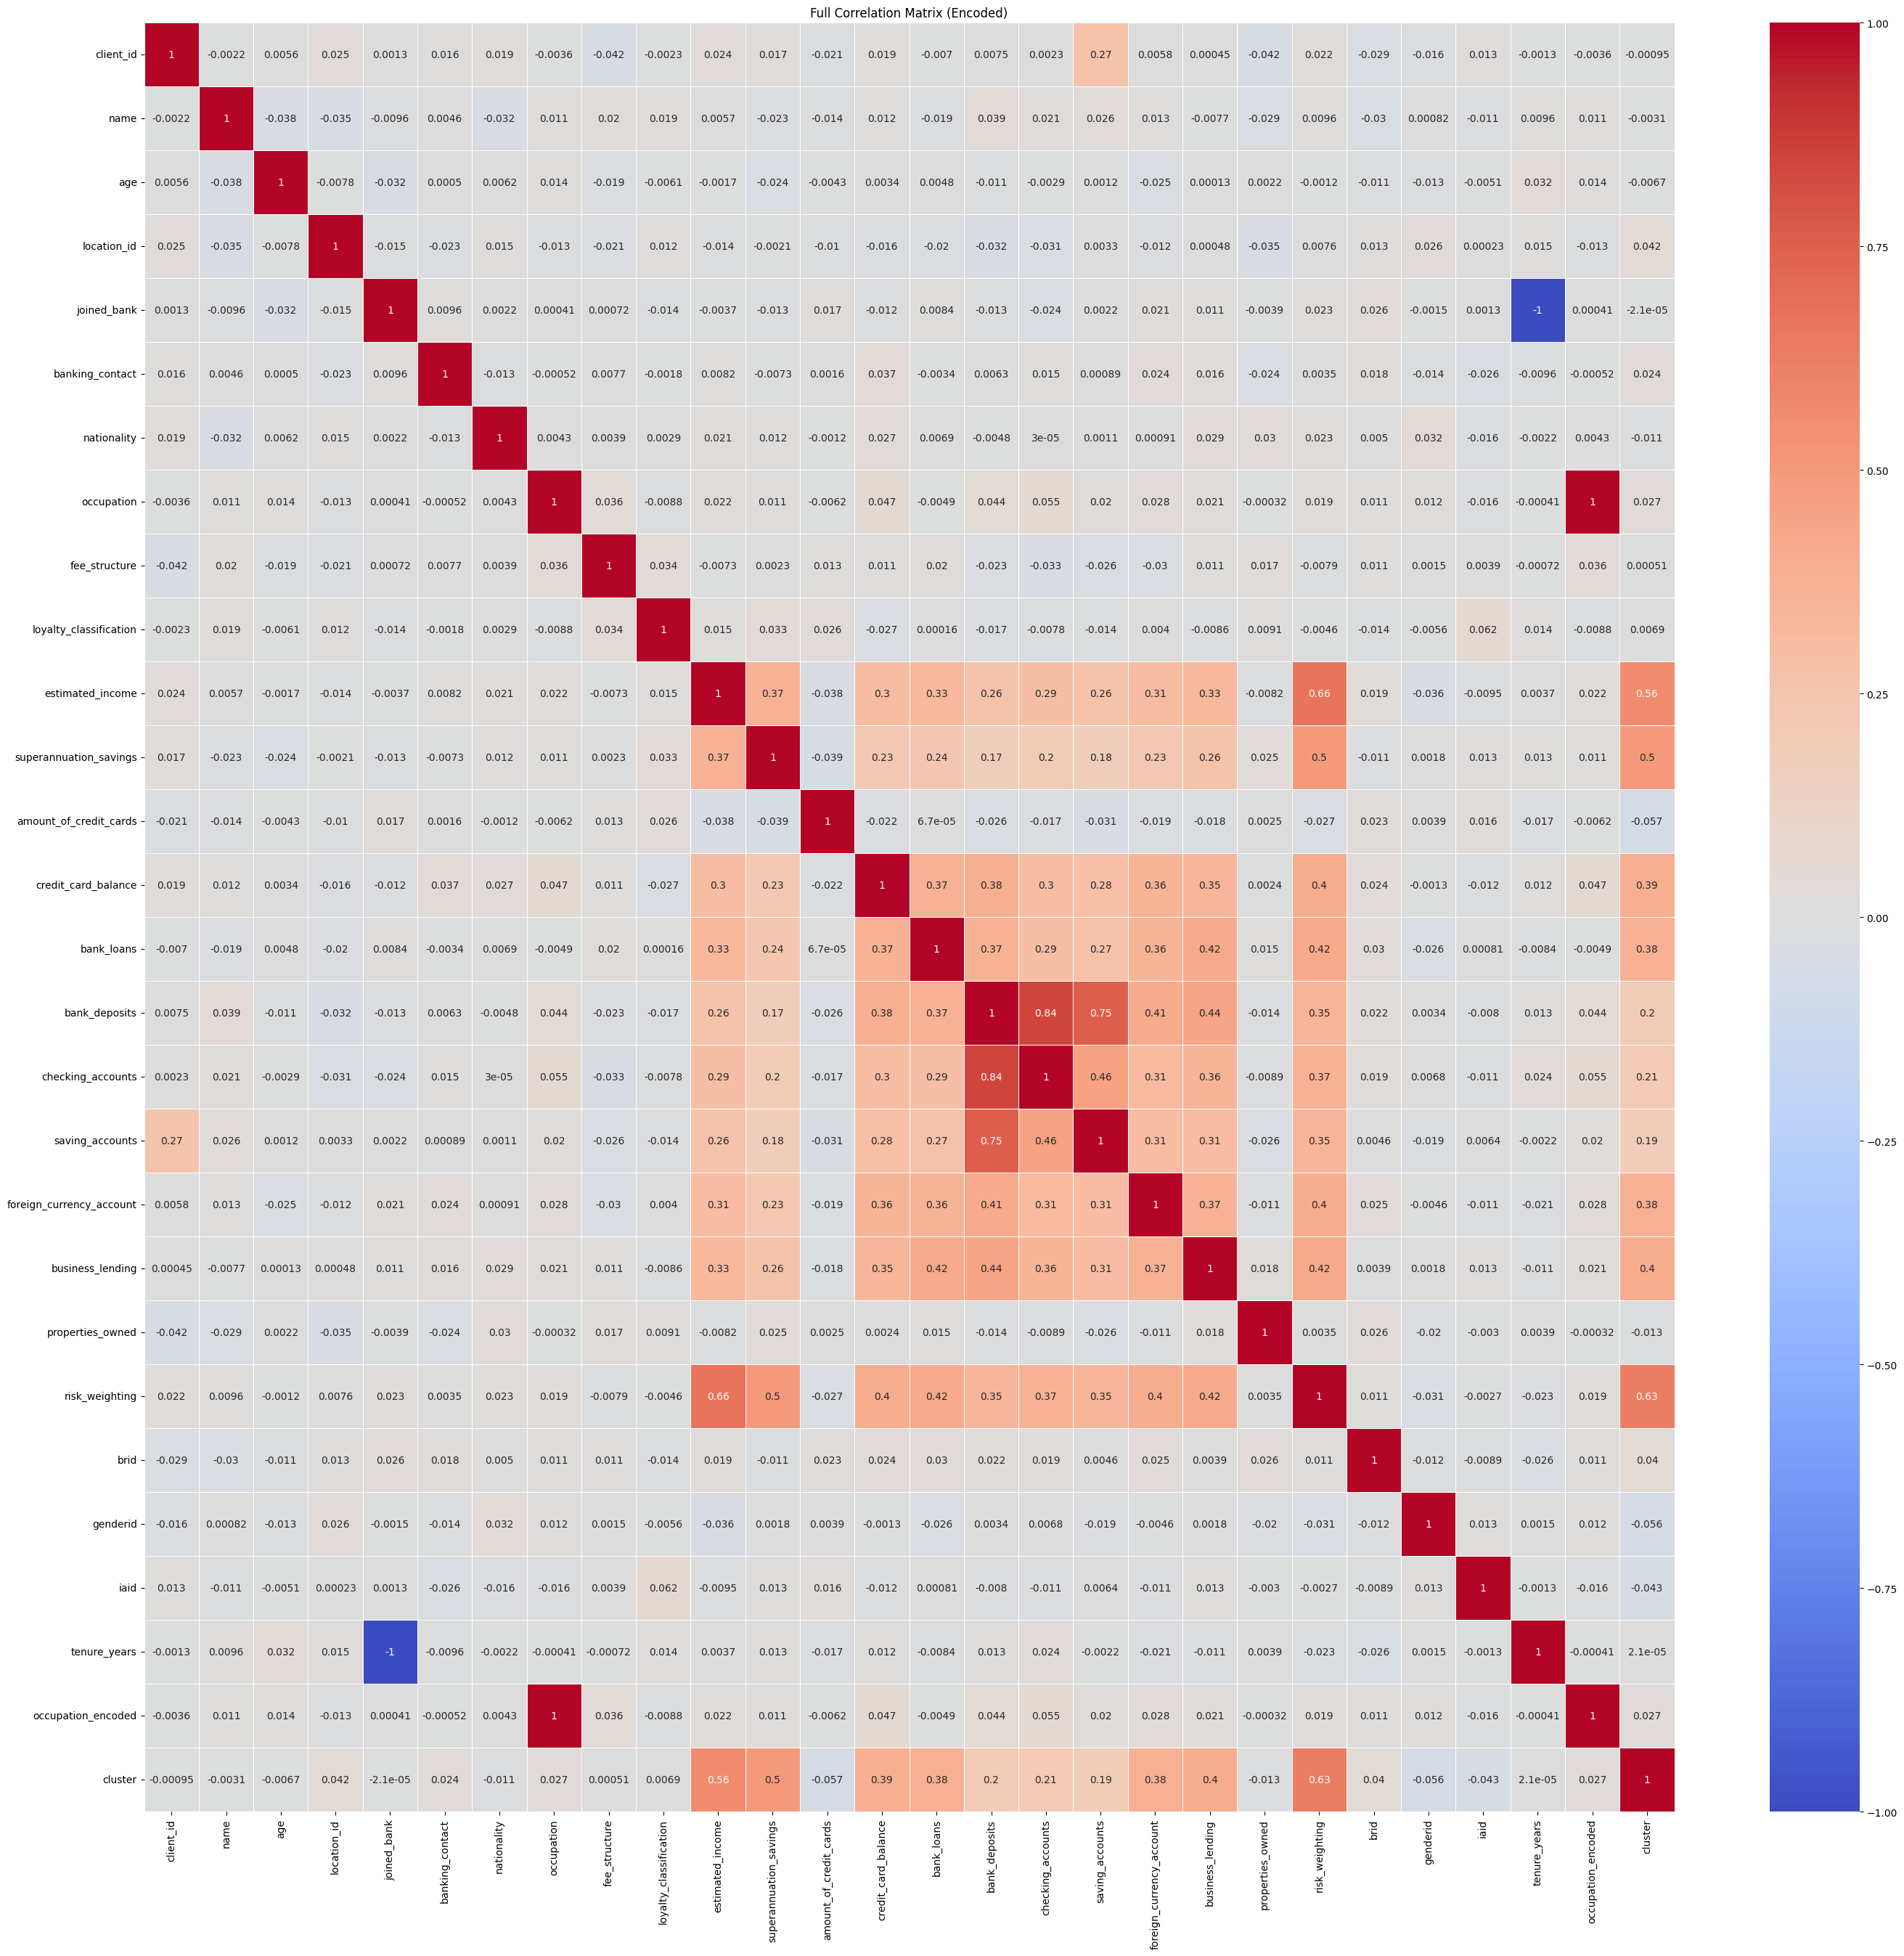

In [26]:
# =======================
# 🔍 8. Correlation Analysis (Fixed)
# =======================

# Make a copy to avoid changing the original dataframe
df_corr = df.copy()

# Encode categorical variables with LabelEncoder
for col in df_corr.select_dtypes(include=['object', 'category']).columns:
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col].astype(str))

# Calculate correlation matrix only on numeric data
correlation_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(34,32))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Full Correlation Matrix (Encoded)')
plt.show()